# 数値シミュレーション

## 数値シミュレーションとは
　物理学とは、この宇宙を記述する学問である。そして、この宇宙は微分方程式で記述されている。方程式さえわかれば、数値的に解くことが可能である。よってある現象に着目した際の方程式を「支配方程式」と言い、その振る舞いを調べることを「数値シミュレーション」という。

　離散化...連続的な表現を行うために、離散的な値に変換することを指す。動画のように、静止画像をコマ送りすることで表現しているため、機械は連続的な表現が難しい。

## 差分化
　微分を離散単位で近似することを指す。差分化により微分方程式を扱う手法を「差分法」と言い、1次近似の差分法を「オイラー法」という。

## ニュートンの運動方程式
　運動方程式とは、時間に関する連立常微分方程式である。ここで、2つの物体の間に距離の2乗に反比例する力を仮定すると、宇宙空間内で互いに重力で引き合う2つの星の運動を表す方程式となる。これを解くと、起動が楕円になること、面積速度一定速、調和の法則などのケプラーの三法則が導かれる。  
　自然科学において、法則とは、実験や観測などで再現可能な自然の振る舞いである。物理学とは、より基本的な原理から、観測事実である「法則」を導き、説明しようとする営みである。

## 反応拡散方程式
　ニュートンの運動方程式を数値的に解くことで弾道計算を行った。時間のみ離散化し、空間は連続のまま扱った。時間と空間の2つを離散化する例として反応拡散系があります。  
　ある種類の化合物を混ぜて反応させるとある物質ができたり消えたりを繰り返す。最も有名なとして、BZ反応がある

# 課題:数値シミュレーション

1. 運動方程式

In [1]:
# ライブラリのインポート
import matplotlib.pyplot as plt
from math import pi, cos, sin
from pylab import rcParams

In [2]:
# プロットサイズの変更
rcParams['figure.figsize']=10, 5

In [3]:
# 運動方程式の数値解法
def throw(theta, y0):
  rx, ry=0.0, y0
  vx, vy=cos(theta), sin(theta)
  ax, ay=[], []
  g=1.0
  h=0.001
  while ry>=0.0:
    rx+=vx*h
    ry+=vy*h
    vy-=g*h
    ax.append(rx)
    ay.append(ry)
  return ax, ay


In [4]:
# プロット
def plot(angles, y0=0.0):
  for theta in angles:
    nx, ny=throw(theta/180.0*pi, y0)
    plt.plot(nx, ny, label=theta)
  plt.legend()
  plt.show()

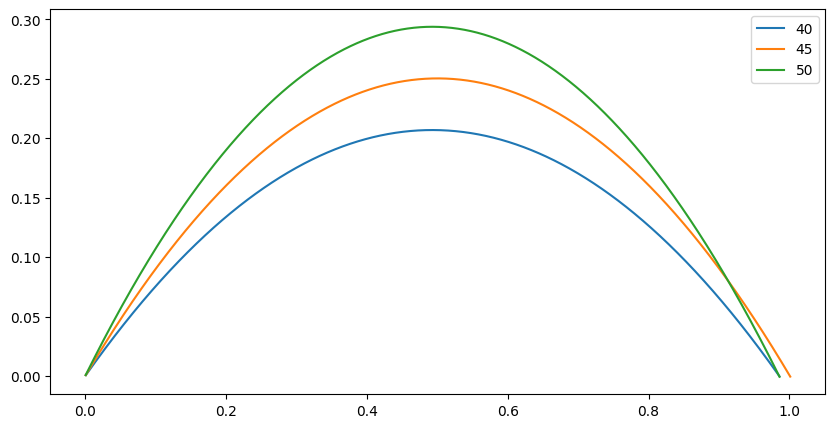

In [5]:
# 地面から投げた場合
angles=[40, 45, 50]
plot(angles)

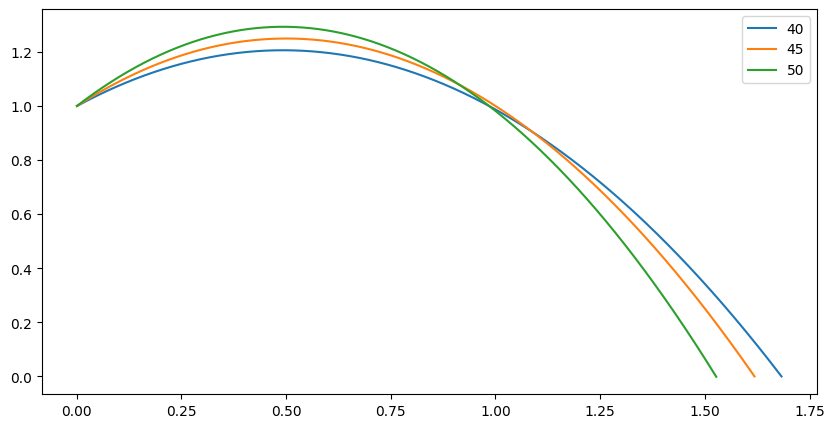

In [6]:
# 台の上から投げた場合
angles=[40, 45, 50]
plot(angles, 1.0)

2. (発展)初速依存性

In [7]:
# 初速2の場合の運動方程式の数値解法
def throw2(theta, y0):
  rx, ry=0.0, y0
  vx, vy=2.0*cos(theta), 2.0*sin(theta) # 書き換え箇所
  ax, ay=[], []
  g=1.0
  h=0.001
  while ry>=0.0:
    rx+=vx*h
    ry+=vy*h
    vy-=g*h
    ax.append(rx)
    ay.append(ry)
  return ax, ay

In [8]:
# プロット2
def plot(angles, y0=0.0):
  for theta in angles:
    nx, ny=throw2(theta/180.0*pi, y0)
    plt.plot(nx, ny, label=theta)
  plt.legend()
  plt.show()

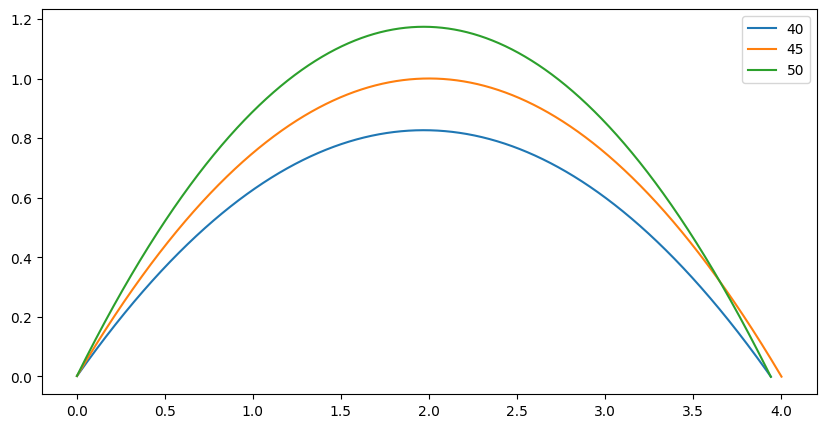

In [9]:
# 地面から投げた場合
angles=[40, 45, 50]
plot(angles)

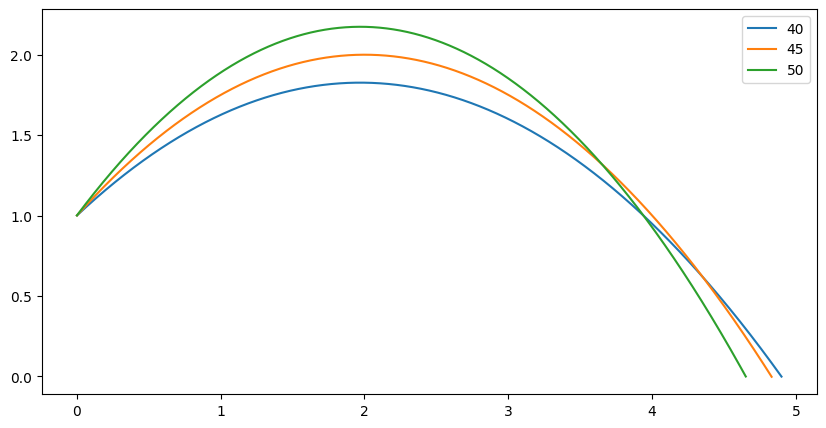

In [10]:
# 台の上から投げた場合
angles=[40, 45, 50]
plot(angles, 1.0)

3. 反応拡散方程式

In [39]:
# ライブラリのインポート
import matplotlib.pyplot as plt
import numpy as np
from numba import jit
from matplotlib import animation, rc

In [12]:
# ラプラシアンの実装
@jit
def laplacian(m, n, s):
  ts=0.0
  ts+=s[m+1][n]
  ts+=s[m-1][n]
  ts+=s[m][n+1]
  ts+=s[m][n-1]
  # ここを埋めよ
  ts-=4*s[m][n]
  return ts

In [17]:
# ラプラシアンのテスト
a=np.arange(9).reshape(3, 3)
a[0, 1]=0
a

array([[0, 0, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [18]:
a=np.arange(9).reshape(3, 3)
a[0, 1]=0
laplacian(1, 1, a)

-1.0

In [44]:
# 時間発展
@jit # でコーダを忘れないこと
def calc(u, v, u2, v2):
  L, _=u.shape
  dt=0.2
  F=0.04
  k=0.06075
  Du=0.1
  Dv=0.05
  lu=np.zeros((L, L))
  lv=np.zeros((L, L))
  for ix in range(1, L-1):
    for iy in range(1, L-1):
      lu[ix, iy]=Du*laplacian(ix, iy, u)
      lv[ix, iy]=Dv*laplacian(ix, iy, v)
  cu=-v*v*u+F*(1.0-u)
  cv=v*v*u-(F+k)*v
  u2[:]=u+(lu+cu)*dt
  v2[:]=v+(lv+cv)*dt

In [45]:
# シミュレーションループ
@jit
def simulation(L, loop):
  u=np.zeros((L, L))
  u2=np.zeros((L, L))
  v=np.zeros((L, L))
  v2=np.zeros((L, L))
  h=L//2
  u[h-6:h+6, h-6:h+6]=0.9
  v[h-3:h+3, h-3:h+3]=0.7
  r=[]
  for i in range(loop):
    calc(u, v, u2, v2)
    u, u2, v, v2=u2, u, v2, v
    if i%100==0:
      r.append(v.copy())
  return r

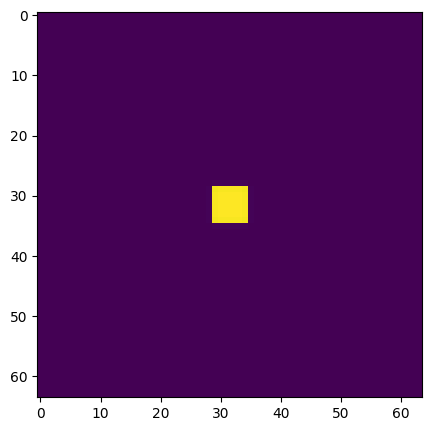

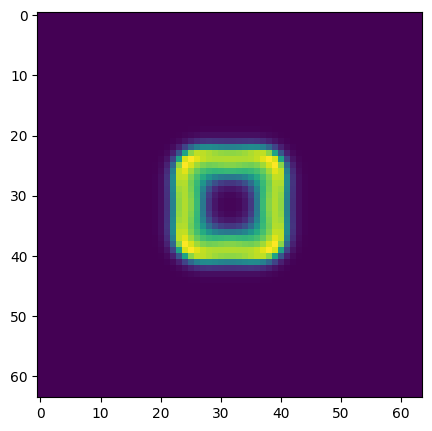

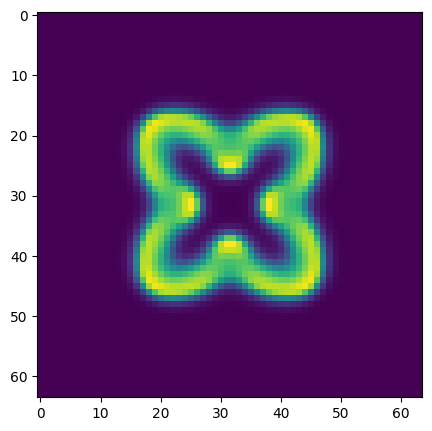

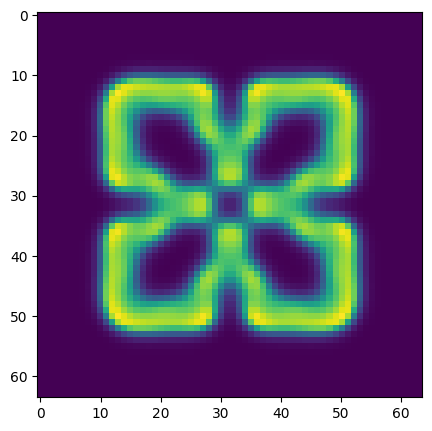

In [46]:
# シミュレーションの実行
imgs=simulation(64, 10000)
n=len(imgs)
for i in range(4):
  im=plt.imshow(imgs[n//4*i])
  plt.show()

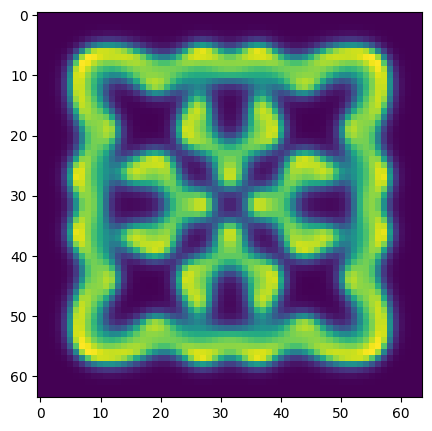

In [47]:
# アニメーション
fig=plt.figure()
im=plt.imshow(imgs[-1])
def update(i):
  im.set_array(imgs[i])

In [48]:
# アニメーションの表示
rc('animation', html='jshtml')
animation.FuncAnimation(fig, update, interval=50, frames=len(imgs))

Output hidden; open in https://colab.research.google.com to view.